In [1]:
import pandas as pd
from tabulate import tabulate

# Raw Metrics for calculation of mean and standard deviation
raw_metrics = {
    "precision": {
        "glioma": [0.91, 0.82, 0.90], 
        "meningioma": [0.50, 0.50, 0.46], 
        "notumor": [0.94, 0.90, 0.92], 
        "pituitary": [0.83, 0.78, 0.89]
    },
    "recall": {
        "glioma": [0.57, 0.60, 0.43], 
        "meningioma": [0.79, 0.60, 0.82], 
        "notumor": [0.92, 0.93, 0.92], 
        "pituitary": [0.82, 0.86, 0.87]
    },
    "f1-score": {
        "glioma": [0.70, 0.69, 0.58], 
        "meningioma": [0.61, 0.55, 0.59], 
        "notumor": [0.93, 0.92, 0.92], 
        "pituitary": [0.83, 0.81, 0.88]
    }
}

accuracy_values = [0.76, 0.75, 0.74]

# Calculating means and standard deviations
avg_metrics = {metric: {label: sum(values) / len(values) for label, values in labels.items()} for metric, labels in raw_metrics.items()}
std_dev_metrics = {metric: {label: pd.Series(values).std() for label, values in labels.items()} for metric, labels in raw_metrics.items()}

accuracy = sum(accuracy_values) / len(accuracy_values)
accuracy_std = pd.Series(accuracy_values).std()

# Creating a DataFrame from the averaged metrics and standard deviations
avg_metrics_df = pd.DataFrame(avg_metrics)
std_dev_df = pd.DataFrame(std_dev_metrics)

# Calculating the macro averages
macro_precision = avg_metrics_df['precision'].mean()
macro_recall = avg_metrics_df['recall'].mean()
macro_f1_score = avg_metrics_df['f1-score'].mean()

# Macro standard deviations are not directly meaningful in this context

# Combining averages and standard deviations in a DataFrame
avg_plus_std_df = avg_metrics_df.copy()
for col in avg_plus_std_df.columns:
    avg_plus_std_df[col] = avg_plus_std_df[col].apply(lambda x: f'{x:.2f}') + " ± " + std_dev_df[col].apply(lambda x: f'{x:.2f}')

# Macro averages DataFrame
macro_avg_df = pd.DataFrame({"precision": [f'{macro_precision:.2f}'], "recall": [f'{macro_recall:.2f}'], "f1-score": [f'{macro_f1_score:.2f}']}, index=["Macro Average"])

# Printing the table using tabulate
classification_report = tabulate(avg_plus_std_df, headers='keys', tablefmt='pipe', numalign="right")
macro_average_report = tabulate(macro_avg_df, headers='keys', tablefmt='pipe', numalign="right")

print("Average classification report (3 different seeds):")
print("--------------------------------------------------------")
print(classification_report)
print("--------------------------------------------------------")
print("\n")
print("-------------------------------------------------------")
print(macro_average_report)
print("-------------------------------------------------------")
print(f"\nAccuracy: {accuracy:.2%} ± {accuracy_std:.2%}")

Average classification report (3 different seeds):
--------------------------------------------------------
|            | precision   | recall      | f1-score    |
|:-----------|:------------|:------------|:------------|
| glioma     | 0.88 ± 0.05 | 0.53 ± 0.09 | 0.66 ± 0.07 |
| meningioma | 0.49 ± 0.02 | 0.74 ± 0.12 | 0.58 ± 0.03 |
| notumor    | 0.92 ± 0.02 | 0.92 ± 0.01 | 0.92 ± 0.01 |
| pituitary  | 0.83 ± 0.06 | 0.85 ± 0.03 | 0.84 ± 0.04 |
--------------------------------------------------------


-------------------------------------------------------
|               |   precision |   recall |   f1-score |
|:--------------|------------:|---------:|-----------:|
| Macro Average |        0.78 |     0.76 |       0.75 |
-------------------------------------------------------

Accuracy: 75.00% ± 1.00%


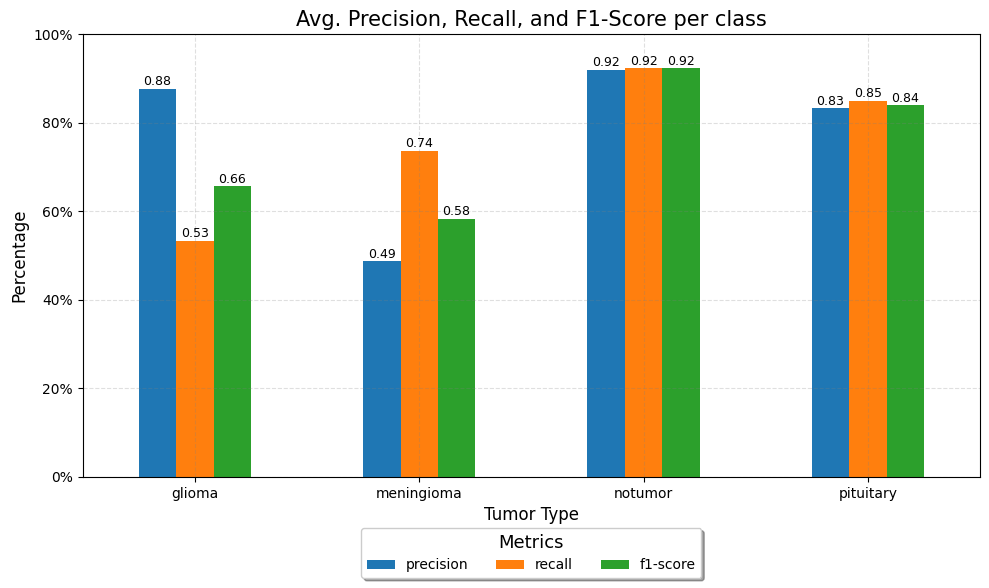

In [2]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
ax = avg_metrics_df.plot(kind='bar', ax=plt.gca(), color=['#1f77b4', '#ff7f0e', '#2ca02c'])

# Adding titles and labels
plt.title('Avg. Precision, Recall, and F1-Score per class', fontsize=15)
plt.ylabel('Percentage', fontsize=12)
plt.xlabel('Tumor Type', fontsize=12)
plt.xticks(rotation=0, fontsize=10)
plt.yticks(fontsize=10)

# Setting legend in the middle bottom
plt.legend(title='Metrics', fontsize=10, title_fontsize='13', loc='upper center', bbox_to_anchor=(0.5, -0.1), fancybox=True, shadow=True, ncol=3)

# Setting limits and grid
plt.ylim(0, 1)  # Scaling y-axis to percentages
ax.yaxis.set_major_formatter(plt.FuncFormatter('{:.0%}'.format))  # Formatting y-axis as percentage
plt.grid(True, linestyle='--', which='major', color='grey', alpha=.25)

# Adding data labels
for p in ax.patches:
    ax.annotate(f"{p.get_height():.2}", (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=9, color='black', rotation=0, xytext=(0, 5),
                textcoords='offset points')

plt.tight_layout()
plt.show()

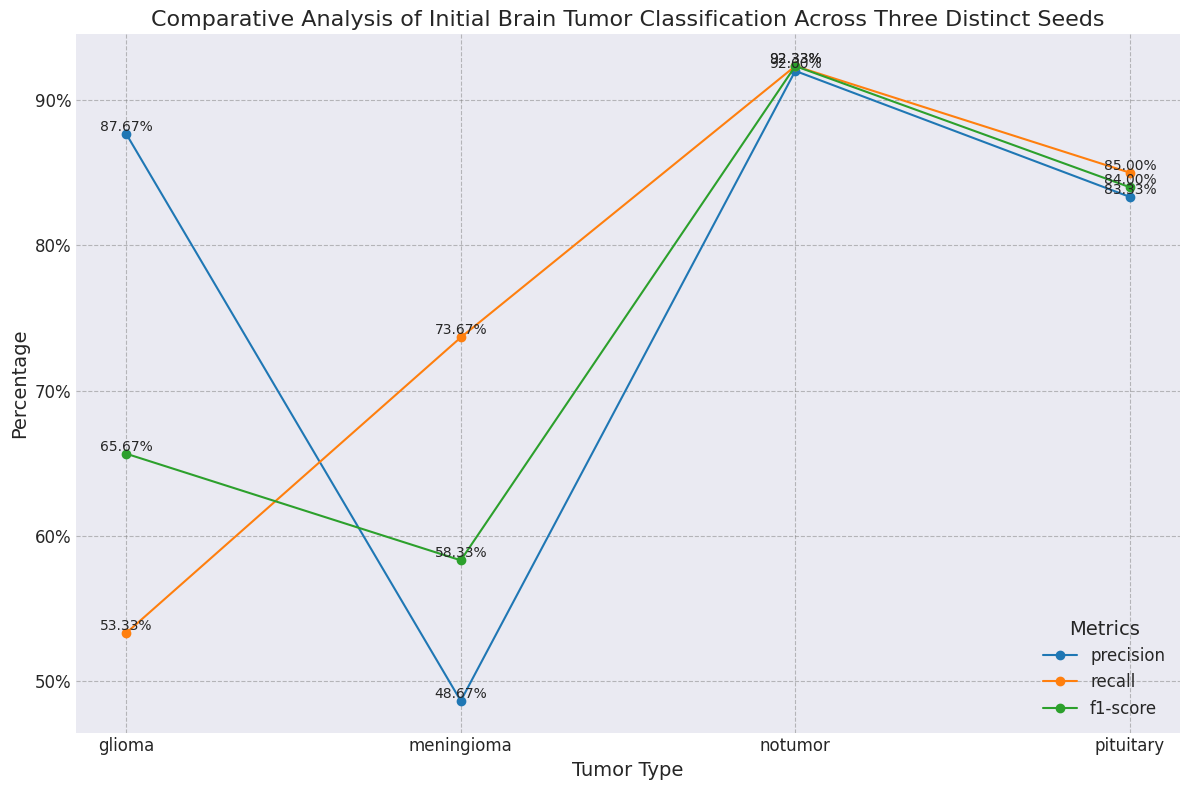

In [3]:
# Setting the style for the plot
plt.style.use('seaborn-v0_8-darkgrid')

# Creating a new figure
plt.figure(figsize=(12, 8))

# Plotting each metric as a separate line
for column in avg_metrics_df.columns:
    plt.plot(avg_metrics_df[column], marker='o', label=column)

# Adding titles and labels
plt.title('Comparative Analysis of Initial Brain Tumor Classification Across Three Distinct Seeds', fontsize=16)
plt.xlabel('Tumor Type', fontsize=14)
plt.ylabel('Percentage', fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)

# Adding legend
plt.legend(title='Metrics', fontsize=12, title_fontsize=14)

# Formatting y-axis as percentage
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter('{:.0%}'.format))

# Adding grid
plt.grid(True, linestyle='--', color='grey', alpha=.5)

# Adding annotations for clarity
for i, row in avg_metrics_df.iterrows():
    for col in avg_metrics_df.columns:
        plt.text(i, row[col], f"{row[col]:.2%}", ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

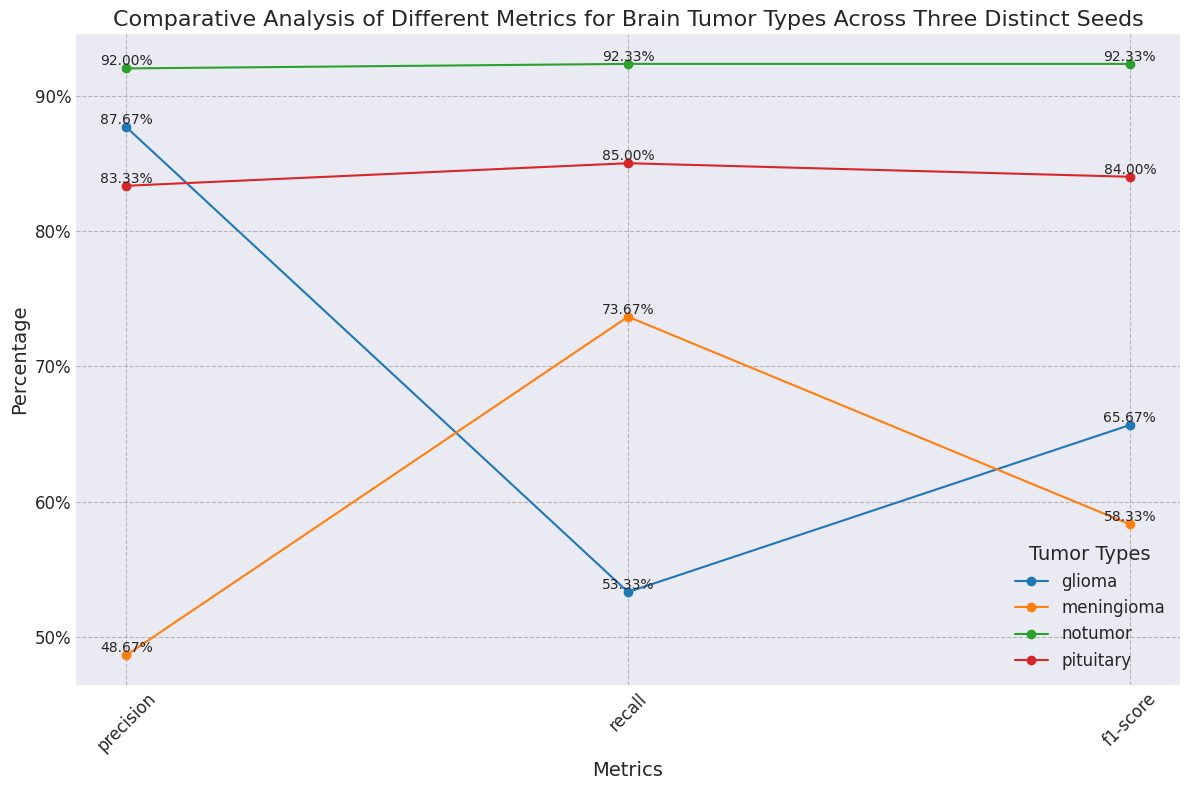

In [4]:
import matplotlib.pyplot as plt

# Setting the style for the plot
plt.style.use('seaborn-v0_8-darkgrid')

# Creating a new figure
plt.figure(figsize=(12, 8))

# Plotting each tumor type as a separate line
for tumor_type in avg_metrics_df.index:
    plt.plot(avg_metrics_df.columns, avg_metrics_df.loc[tumor_type], marker='o', label=tumor_type)

# Adding titles and labels
plt.title('Comparative Analysis of Different Metrics for Brain Tumor Types Across Three Distinct Seeds', fontsize=16)
plt.xlabel('Metrics', fontsize=14)
plt.ylabel('Percentage', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Adding legend
plt.legend(title='Tumor Types', fontsize=12, title_fontsize=14)

# Formatting y-axis as percentage
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter('{:.0%}'.format))

# Adding grid
plt.grid(True, linestyle='--', color='grey', alpha=.5)

# Adding annotations for clarity
for col in avg_metrics_df.columns:
    for i, value in enumerate(avg_metrics_df[col]):
        plt.text(col, value, f"{value:.2%}", ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()